In [168]:
# Import Statements
import os
import pandas as pd
import re
import datetime
import calendar
import numpy as np
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
from nltk.corpus import stopwords 
import matplotlib.pyplot as plt



In [2]:
# Importing Car Assignments

current_directory = os.getcwd()
print(current_directory)

print(current_directory)
os.chdir(current_directory)
# car_assignments = pd.read_csv(current_directory+'\\car_assignments.csv', encoding='cp1252')


c:\Users\dunca\OneDrive\Documents\GitHub\The_Last_Stand\Project Deliverables and Notes
c:\Users\dunca\OneDrive\Documents\GitHub\The_Last_Stand\Project Deliverables and Notes


In [3]:
# Setting the folder for the file path
article_path = current_directory+"\\TP-1_Kronos\\articles"

In [4]:
# Setting up a blank dictionary to add in values
article_num = []
date = []
art_length = []
news_comp = []

for a_num in os.listdir(article_path):
    
    # Adding the Article Name
    article_num.append(a_num)
        
    # Going into the file 
    open_file = os.path.join(article_path, a_num)

    with open(open_file,'r') as file:
        # Opening the file
        content = file.read()
        
        # Adding in the Article Character lengths.
        art_length.append(len(content))
        
        # Adding in the News Organization Name.
        news_comp.append(content.lstrip('\n').split("\n", 1)[0])

        # Using Regular Expressions to extract two date types
        date_pattern1 = r'\d{4}/\d{2}/\d{2}' # yyyy/mm/dd --> format 
        date_pattern2 = r'\d{1,2} [a-zA-Z]+ \d{4}' # day month year --> format
            
        # Looking for the two date patterns
        dates1 = re.findall(date_pattern1, content)
        dates2 = re.findall(date_pattern2, content)

        # Adding the dates back together            
        dates = dates1 + dates2

        # Going through the articles and looking for the dates
        try:
            if dates[0][-4:-2] == '20':
                # Grabbing the month and assigning it a number
                if 'JAN' in dates[0].upper(): mon = 1
                elif 'FEB' in dates[0].upper(): mon = 2                     
                elif 'MAR' in dates[0].upper(): mon = 3                    
                elif 'APR' in dates[0].upper(): mon = 4
                elif 'MAY' in dates[0].upper(): mon = 5
                elif 'JUN' in dates[0].upper(): mon = 6
                elif 'JUL' in dates[0].upper(): mon = 7
                elif 'AUG' in dates[0].upper(): mon = 8
                elif 'SEP' in dates[0].upper(): mon = 9
                elif 'OCT' in dates[0].upper(): mon = 10
                elif 'NOV' in dates[0].upper(): mon = 11
                elif 'DEC' in dates[0].upper(): mon = 12
                day = dates[0][:3].strip()
                day = re.sub(r"[^0-9]", "", day)
                enter_date = str(dates[0][-4:])+'/'+ str(mon).zfill(2)+ '/'+str(day).zfill(2)
            else:
                enter_date = dates[0]
            date.append(enter_date)                
        except:
            date.append(date[0])                         

In [5]:
# Making a pandas of the event days
enter_article_dates = {'article_num':article_num, 'date':date, 'news_comp':news_comp, 'art_length':art_length}
article_dates = pd.DataFrame(enter_article_dates)

# Showing the added fieds
article_dates.loc[647]

article_num                  681.txt
date                      2012/09/08
news_comp      Homeland Illumination
art_length                      1023
Name: 647, dtype: object

In [6]:
# Displaying the Articles, Dates, News Organization, and length of the article
article_dates.to_csv('Article_dates.csv')
display(article_dates.tail(10))

,article_num,date,news_comp,art_length
835,90.txt,2014/01/20,Tethys News,328
836,91.txt,2000/08/18,News Desk,1143
837,92.txt,2014/01/20,Tethys News,240
838,93.txt,2013/02/09,Everyday News,5162
839,94.txt,2014/01/20,Homeland Illumination,319
840,95.txt,2009/06/20,News Online Today,519
841,96.txt,2011/07/28,The Truth,614
842,97.txt,1995/04/01,The General Post,803
843,98.txt,1995/11/22,News Online Today,506
844,99.txt,2014/01/20,Modern Rubicon,399


### This Next bit of code is to look at the death of Elian Karel and 6/20 events

In [7]:
# Uploading the articles with there datas
article_dates = pd.read_csv('Article_dates.csv')
article_dates['date'] = pd.to_datetime(article_dates['date'])
article_dates['month_day'] = article_dates['date'].dt.strftime('%m-%d')
june_20th_hist = article_dates[(article_dates['month_day'] == '06-20')  & (article_dates['date'] > '2010-01-01')]
june_20th_hist = june_20th_hist[['article_num', 'date', 'news_comp', 'art_length', 'month_day']]
june_20th_hist

,article_num,date,news_comp,art_length,month_day
36,130.txt,2013-06-20,Kronos Star,1168,06-20
38,132.txt,2012-06-20,World Source,1445,06-20
70,161.txt,2011-06-20,Homeland Illumination,2747,06-20
90,18.txt,2012-06-20,Homeland Illumination,1869,06-20
141,225.txt,2011-06-20,Homeland Illumination,2747,06-20
171,252.txt,2013-06-20,News Online Today,351,06-20
201,28.txt,2011-06-20,Kronos Star,509,06-20
204,282.txt,2012-06-20,International Times,1891,06-20
213,290.txt,2013-06-20,Homeland Illumination,1942,06-20
295,364.txt,2012-06-20,Kronos Star,1183,06-20


The next bit of code uses nltk to Tokenize and create work frequencies

In [9]:
import nltk
from nltk.corpus import stopwords
import string

# Setting up my stop words
stop_words = set(stopwords.words('english'))
punctuation = re.compile(r'[^\w\s]')

# creating a distribution dictionary
freq_dist = nltk.FreqDist()

# Sentitment Analysis of historical dates
for a_num in os.listdir(article_path):
    if a_num in june_20th_hist['article_num'].tolist():
    # Going into the file
        open_file = os.path.join(article_path, a_num)
        with open(open_file,'r') as file:
            content = file.read()
            # Making Everything lower case
            content = punctuation.sub('', content.lower())
            
            # Tokenizing the words
            tokens = nltk.word_tokenize(content)

            # Filtering out the Stop words
            filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
            
            # Updating the frequency distribution
            freq_dist.update(filtered_tokens)

print(type(freq_dist))

# printing out the frequency distribution
for word, count in freq_dist.most_common(20):
    print(word, ':', count)

<class 'nltk.probability.FreqDist'>
police : 58
abila : 42
kronos : 41
pok : 41
elian : 37
government : 28
karel : 27
crowd : 24
several : 20
death : 19
juliana : 18
protestors : 17
died : 17
would : 17
june : 16
riot : 15
karels : 15
members : 14
gas : 14
time : 14


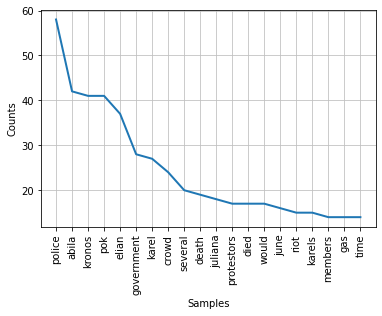

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [10]:
# Displaying a graph of the FreqDistribution
freq_dist.plot(20)

The Next bit of code is going through the articles during the kidnapping time line.
The Time in which the articles are published is extracted to help read them in order

In [18]:
# Capturing the Two days during the disappearance timeline
crime_dates = article_dates[(article_dates['date'] == '2014-01-20') | (article_dates['date'] == '2014-01-21')]
crime_dates = crime_dates[['article_num', 'date', 'news_comp','art_length', 'month_day']]
crime_dates

,article_num,date,news_comp,art_length,month_day
2,10.txt,2014-01-20,Homeland Illumination,463,01-20
9,106.txt,2014-01-21,Modern Rubicon,261,01-21
10,107.txt,2014-01-20,The General Post,1857,01-20
13,11.txt,2014-01-20,Tethys News,411,01-20
14,110.txt,2014-01-21,Homeland Illumination,814,01-21
...,...,...,...,...,...
834,9.txt,2014-01-20,Kronos Star,321,01-20
835,90.txt,2014-01-20,Tethys News,328,01-20
837,92.txt,2014-01-20,Tethys News,240,01-20
839,94.txt,2014-01-20,Homeland Illumination,319,01-20


In [22]:
# Setting up regular expressions to look for time
from datetime import datetime

# Looking for time patterns
time_pattern = r'(\d{2})(\d{2})\s*-\s*'
article_time = []

# Goiong throuigh the Articles during the kidnapping date
for a_num in crime_dates.iterrows():
    
    # Opening up the file
    open_file = os.path.join(article_path, a_num[1][0])
    with open(open_file,'r') as file:
        content = file.read()
        
        # Finding the time
        match = re.search(time_pattern, content)
        
        # Extract the matched time from the string
        if match:
            hour = match.group(1)
            minute = match.group(2)
        else:
            hour = 00
            minute = 00

        # Transforming the date time               
        dt = datetime.strptime(str(hour) + ":" + str(minute), "%H:%M")
        
        # Adding in time change
        article_time.append(dt.time())
            
# Adding in the atricle times            
crime_dates['article_time'] = article_time

# Changing the data type
crime_dates['article_time'] = crime_dates['article_time'].astype(str)

In [23]:
# Sorting the Article Time
crime_dates = crime_dates.sort_values(by=['month_day', 'article_time'])

# Dropping the index to make it easier to read
crime_dates = crime_dates.reset_index(drop=True)

# Adding in date time
crime_dates['datetime'] = pd.to_datetime(crime_dates['date'].dt.date.astype(str) + ' ' + crime_dates['article_time'])



In [24]:
# Making a pivot of the date and time so that I can look at the different events
crime_df  = pd.DataFrame(crime_dates.groupby([crime_dates['datetime'].dt.date,crime_dates['datetime'].dt.hour])['article_num'].apply(list))
crime_df

article_num
datetime   datetime                                                   
2014-01-20 0         [107.txt, 11.txt, 122.txt, 125.txt, 138.txt, 1...
           9                                        [348.txt, 597.txt]
           10        [10.txt, 232.txt, 13.txt, 470.txt, 563.txt, 84...
           11        [562.txt, 669.txt, 203.txt, 415.txt, 208.txt, ...
           12        [355.txt, 67.txt, 280.txt, 616.txt, 830.txt, 4...
           13                     [642.txt, 307.txt, 522.txt, 828.txt]
           14                              [811.txt, 521.txt, 719.txt]
           15        [21.txt, 320.txt, 426.txt, 427.txt, 56.txt, 77...
           16                                       [655.txt, 733.txt]
           17               [417.txt, 43.txt, 15.txt, 94.txt, 487.txt]
           18        [649.txt, 842.txt, 592.txt, 665.txt, 362.txt, ...
           19        [412.txt, 783.txt, 567.txt, 817.txt, 313.txt, ...
           20                     [834.txt, 172.txt, 386.txt, 384.txt]
           22                                       [118.txt, 744.txt]
2014-01-21 0         [106.txt, 159.txt, 167.txt, 178.txt, 219.txt, ...
           7                                        [142.txt, 738.txt]
           9                                        [418.txt, 583.txt]
           10                                       [556.txt, 624.txt]
           11                              [579.txt, 110.txt, 793.txt]
           12                                       [407.txt, 708.txt]
           20                                        [218.txt, 30.txt]

Now that the articles for the timeline have been arranged into proper fashion, it is time to look into them.
The next bit of code goes through different times and extracts words with the different hours

In [187]:
# Define a function to extract meaningful words from a text file
def extract_words(filename):
    # Open the file
    with open(filename, 'r') as f:
        
        # Read in the contents of the file
        contents = f.read()
        
        word_combo = contents
        # Tokenize the text into words
        words = nltk.word_tokenize(contents)
        
        # Remove stopwords
        stopwords = set(nltk.corpus.stopwords.words('english'))
        
        # Making the words lower case and removing the stop words
        words = [w.lower() for w in words if w.lower() not in stopwords]
        
        # Stem the words
        stemmer = nltk.stem.PorterStemmer()
        words = [stemmer.stem(w) for w in words]
        # Return the extracted words
        return [set(words), contents]
    
def melt_words(filename):
    '''The purpose of this file is to extract all the words.'''


# Setting up a blank word list
article_list = []
outer_word_list = []    
j = 0

# Iterate through the rows of the data frame
for i, row in crime_df.iterrows():
    
    # Extract the list of filenames from the third column
    filenames = row[0]
    
    # Use the datetime value to determine the hour
    hour = i[1]
    
    # Create an empty set to store the extracted words for this hour
    extracted_words = set()
    
    # Creating an index of rows and appending a blank word list
    word_list = []
    
    # Process each file in the list of filenames
    for filename in filenames:
        
        # Construct the full file path
        file_path = os.path.join(article_path, filename)
        
        # Extract the words from the file
        file_words = extract_words(file_path)

        # Add the extracted words to the set for this hour
        extracted_words.update(file_words[0])
    
        # creating lower case contents.
        lower_contents = punctuation.sub('', file_words[1].lower())

        # Tokenizing the words
        tokens = nltk.word_tokenize(lower_contents)

        # removing the stop words
        filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    
        # Adding the list of words
        word_list.append(filtered_tokens)
    
    # Flattening all the words from the multiple articles for the day
    flattened = [val for sublist in word_list for val in sublist]

    # Creating a list of stop wors
    new_stops = ['january', '20', '2014', '21', 'blog', 'voices']
    new_words = [w.lower() for w in flattened if w.lower() not in new_stops]
    
    # Adding this flattened list so that I can look at each hour with all the articles words
    outer_word_list.append(new_words)

FreqDist({'gastech': 386, 'kronos': 234, 'abila': 160, 'police': 96, 'emergency': 78, 'government': 76, 'building': 76, 'employees': 74, 'headquarters': 70, 'pm': 63, ...})

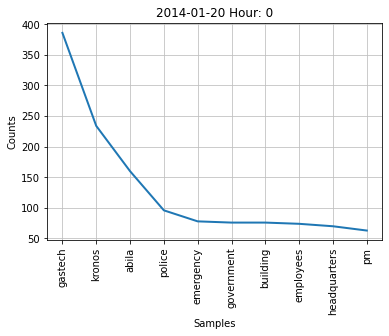

AxesSubplot(0.125,0.125;0.775x0.755)


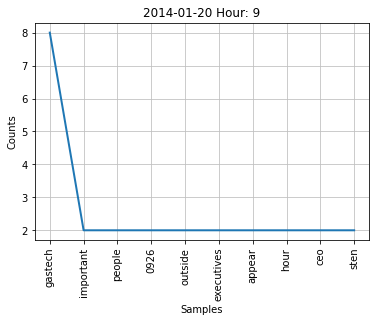

AxesSubplot(0.125,0.125;0.775x0.755)


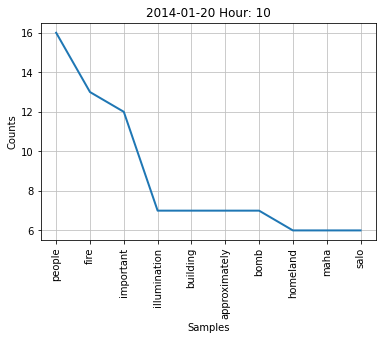

AxesSubplot(0.125,0.125;0.775x0.755)


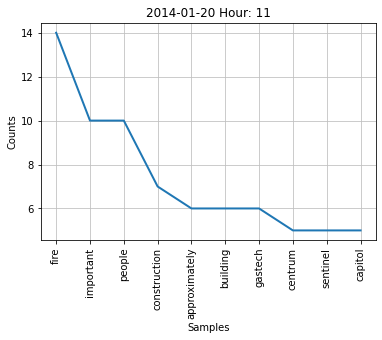

AxesSubplot(0.125,0.125;0.775x0.755)


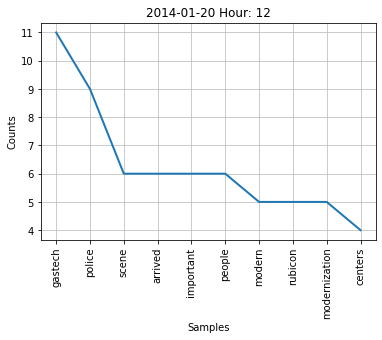

AxesSubplot(0.125,0.125;0.775x0.755)


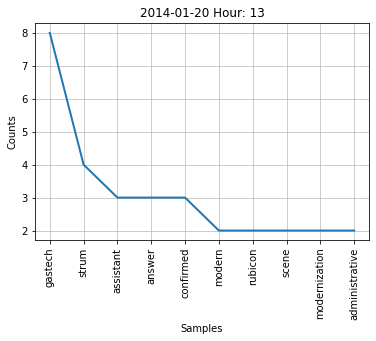

AxesSubplot(0.125,0.125;0.775x0.755)


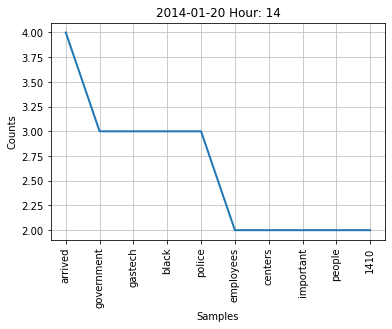

AxesSubplot(0.125,0.125;0.775x0.755)


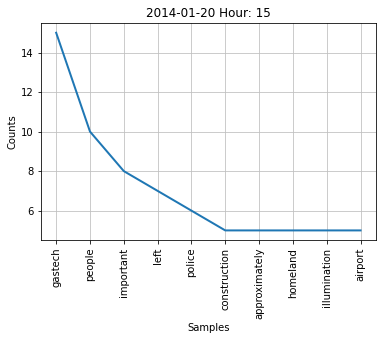

AxesSubplot(0.125,0.125;0.775x0.755)


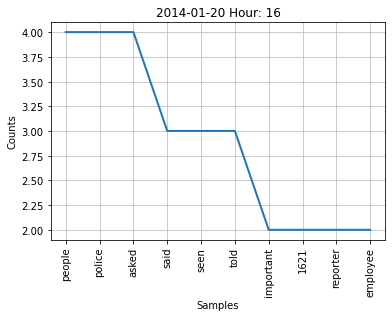

AxesSubplot(0.125,0.125;0.775x0.755)


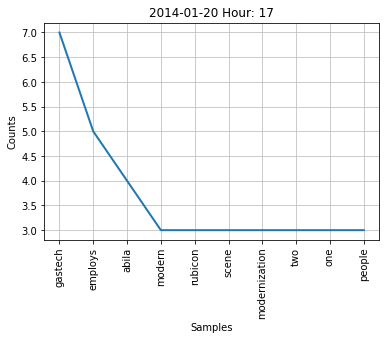

AxesSubplot(0.125,0.125;0.775x0.755)


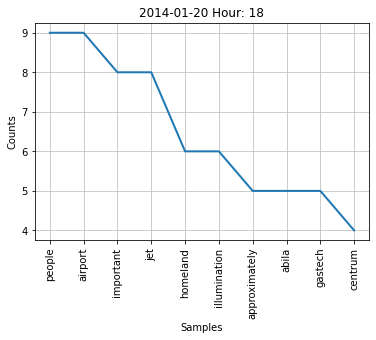

AxesSubplot(0.125,0.125;0.775x0.755)


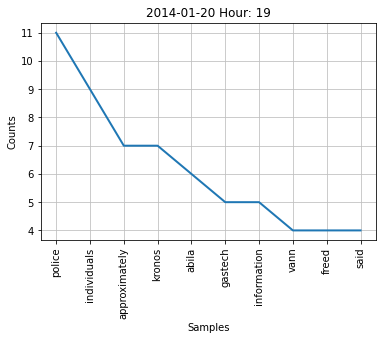

AxesSubplot(0.125,0.125;0.775x0.755)


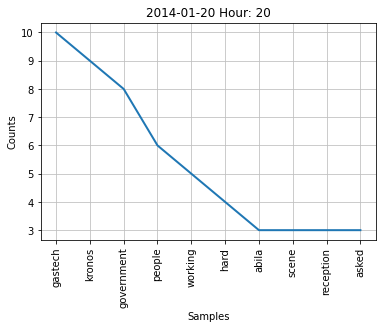

AxesSubplot(0.125,0.125;0.775x0.755)


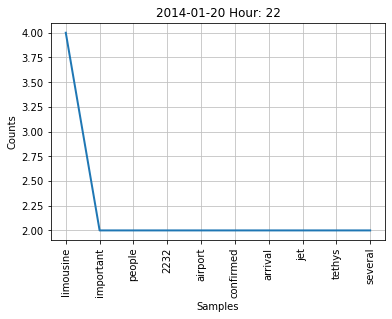

AxesSubplot(0.125,0.125;0.775x0.755)


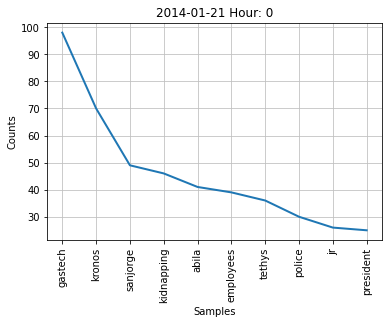

AxesSubplot(0.125,0.125;0.775x0.755)


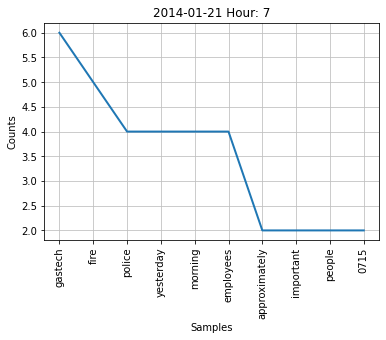

AxesSubplot(0.125,0.125;0.775x0.755)


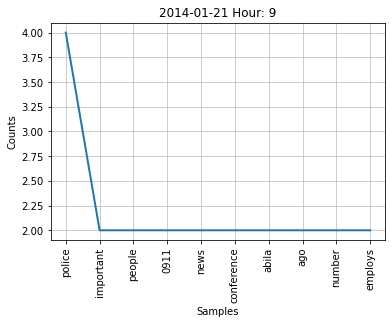

AxesSubplot(0.125,0.125;0.775x0.755)


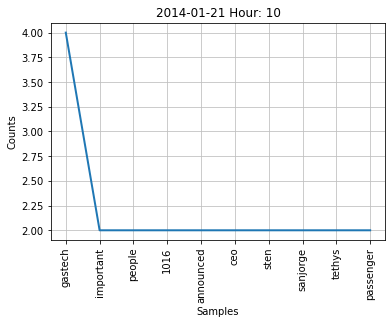

AxesSubplot(0.125,0.125;0.775x0.755)


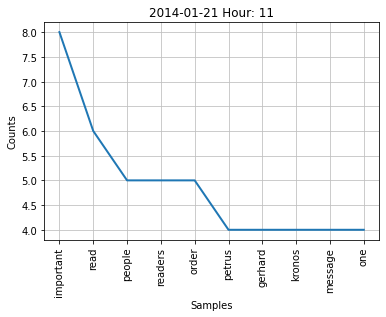

AxesSubplot(0.125,0.125;0.775x0.755)


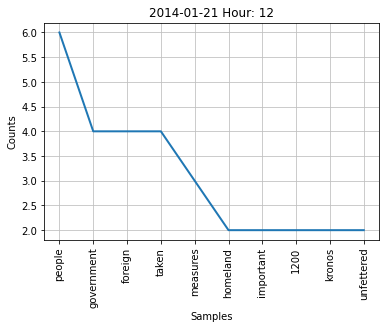

AxesSubplot(0.125,0.125;0.775x0.755)


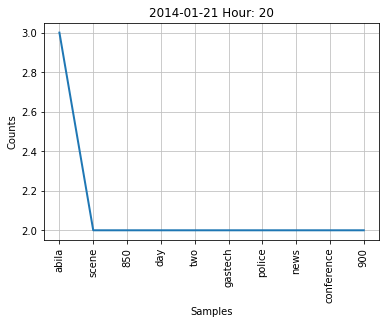

AxesSubplot(0.125,0.125;0.775x0.755)


In [192]:
# Displaying the datetime article numbers and the words that are in those articles
crime_df['word_list'] = outer_word_list
# FreqDist(crime_df['word_list'][0])

# Going through the different articles and displaying the word frequencies
for index, row in crime_df.iterrows():
    freq = FreqDist(row['word_list'])
    print(freq.plot(10, title=str(index[0]) + ' Hour: ' + str(index[1])))

plt.show()